In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Import Libraries 

In [1]:
import os
import cv2
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from skimage.feature import local_binary_pattern 
from skimage.io import imread 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")
from skimage.transform import resize
from skimage.color import rgb2gray



### Load Datasets 

In [2]:
Categories = ['cats', 'dogs']

flat_data_arr = []  
target_arr = []  

datadir="/kaggle/input/nti-data/DS" 
for i in Categories:
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    print(path)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)

loading... category : cats
/kaggle/input/nti-data/DS/cats
loaded category:cats successfully
loading... category : dogs
/kaggle/input/nti-data/DS/dogs
loaded category:dogs successfully


In [3]:
flat_data.shape

(160, 67500)

In [4]:
df=pd.DataFrame(flat_data)
df['Target']=target
df.shape

(160, 67501)

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.154919,0.174317,0.159261,0.158661,0.174558,0.170846,0.160470,0.175946,0.187711,0.162110,...,0.197737,0.138908,0.111461,0.189636,0.138860,0.107701,0.176476,0.136531,0.101754,0
1,0.451656,0.011537,0.071474,0.451754,0.006647,0.057654,0.470726,0.015824,0.064585,0.473853,...,0.643680,0.015653,0.068017,0.646304,0.015167,0.078620,0.654410,0.026440,0.075185,0
2,0.087792,0.064263,0.064263,0.083769,0.060240,0.060240,0.085236,0.061707,0.061707,0.090651,...,0.507295,0.450472,0.414346,0.476542,0.423125,0.416270,0.397952,0.351493,0.353638,0
3,0.260944,0.191197,0.149295,0.261516,0.202531,0.177024,0.162434,0.111474,0.071905,0.290152,...,0.270814,0.252725,0.240934,0.255908,0.244769,0.223443,0.222717,0.224648,0.174112,0
4,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027755,0.027755,0.027755,0.031442,...,0.178500,0.197081,0.206767,0.127526,0.134664,0.120849,0.094547,0.097862,0.078442,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.054325,0.054325,0.046482,0.061677,0.061677,0.053834,0.066359,0.066359,0.058516,0.063123,...,0.048249,0.048249,0.042370,0.049832,0.049832,0.043953,0.049459,0.049459,0.043580,1
156,0.848785,0.825256,0.778197,0.853138,0.829609,0.782550,0.859961,0.836432,0.789373,0.864315,...,0.916018,0.901658,0.878876,0.889710,0.865077,0.772568,0.844781,0.819869,0.705556,1
157,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,1
158,0.320218,0.355512,0.375120,0.316788,0.352083,0.371690,0.314014,0.349308,0.368916,0.315008,...,0.486669,0.521963,0.541571,0.383498,0.418792,0.438400,0.377915,0.413209,0.432817,1


In [6]:
x=df.iloc[:,:-1] 
y=df.iloc[:,-1]

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

### Choose Modol

In [8]:
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state=32)

### Traning The Model 

In [9]:
model.fit(x_train,y_train)


SVC(kernel='linear', random_state=32)

In [10]:
y_pred = model.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_pred, y_test)

print(f"The model is {accuracy*100}% accurate")


[1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1]
The model is 46.875% accurate


In [11]:
print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))


              precision    recall  f1-score   support

         cat       0.48      0.62      0.54        16
         dog       0.45      0.31      0.37        16

    accuracy                           0.47        32
   macro avg       0.47      0.47      0.46        32
weighted avg       0.47      0.47      0.46        32



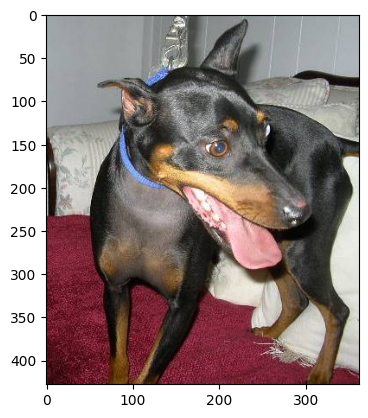

Class: Dog


array([0])

In [12]:
path="/kaggle/input/nti-data/DS/dogs/dog.13.jpg"
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
Predicted_value=model.predict(l)
if Predicted_value >= 0.5:
    print("Class: Cat")
else:
    print("Class: Dog")
Predicted_value

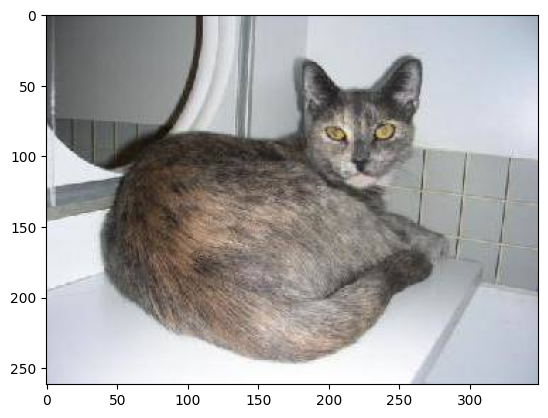

Class: Dog


array([0])

In [13]:
path="/kaggle/input/nti-data/DS/cats/cat.30.jpg"
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
Predicted_value=model.predict(l)
if Predicted_value >= 0.5:
    print("Class: Cat")
else:
    print("Class: Dog")
Predicted_value

### improve The Accuracy

In [14]:
radius = 3
n_points = 8 * radius
METHOD = 'uniform'

### Local Binary Pattern 

In [15]:
def extract_lbp_features(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        return None
    lbp = local_binary_pattern(image, n_points, radius, METHOD)
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist

In [16]:
def load_dataset(folder_path):
    X = []
    y = []
    classes = {'cats': 0, 'dogs': 1}
    for label in classes:
        path = os.path.join(folder_path, label)
        for filename in os.listdir(path):
            img_path = os.path.join(path, filename)
            features = extract_lbp_features(img_path)
            if features is not None:
                X.append(features)
                y.append(classes[label])
    return np.array(X), np.array(y)

In [17]:
X, y = load_dataset("/kaggle/input/nti-data/DS")


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
models = {
    "SVM": SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Naive Bayes": GaussianNB()
}

In [20]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nClassifier: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Report:\n", classification_report(y_test, y_pred))


Classifier: SVM
Accuracy: 0.53125
Report:
               precision    recall  f1-score   support

           0       0.67      0.12      0.21        16
           1       0.52      0.94      0.67        16

    accuracy                           0.53        32
   macro avg       0.59      0.53      0.44        32
weighted avg       0.59      0.53      0.44        32


Classifier: KNN
Accuracy: 0.46875
Report:
               precision    recall  f1-score   support

           0       0.47      0.50      0.48        16
           1       0.47      0.44      0.45        16

    accuracy                           0.47        32
   macro avg       0.47      0.47      0.47        32
weighted avg       0.47      0.47      0.47        32


Classifier: Naive Bayes
Accuracy: 0.75
Report:
               precision    recall  f1-score   support

           0       0.79      0.69      0.73        16
           1       0.72      0.81      0.76        16

    accuracy                           0.75  

### The High Accuracy Is 75% From Naive Bayes 

### We can Test Again 

In [21]:
radius = 3
n_points = 8 * radius

In [22]:
path = "/kaggle/input/nti-data/DS/cats/cat.30.jpg"
img = imread(path)
img_resized = resize(img, (150, 150, 3))


### RGB2GRAY

In [23]:
gray = rgb2gray(img_resized)
lbp = local_binary_pattern(gray, n_points, radius, method="uniform")
(hist, _) = np.histogram(lbp.ravel(),
                         bins=np.arange(0, n_points + 3),
                         range=(0, n_points + 2))
hist = hist.astype("float")
hist /= (hist.sum() + 1e-7)

In [24]:
Predicted_value = model.predict([hist])  

### Model Prediction

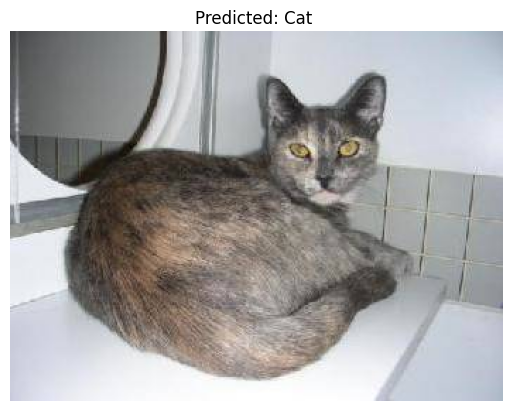

In [25]:

plt.imshow(img)
plt.axis('off')
plt.title("Predicted: Cat " if Predicted_value[0] == 0 else "Predicted: Dog ")
plt.show()


In [26]:
newpath = "/kaggle/input/nti-data/DS/dogs/dog.17.jpg"

In [27]:
img = imread(newpath)
img_resized = resize(img, (150, 150, 3)) 
gray = rgb2gray(img_resized)
lbp = local_binary_pattern(gray, n_points, radius, method="uniform")
(hist, _) = np.histogram(lbp.ravel(),
                         bins=np.arange(0, n_points + 3),
                         range=(0, n_points + 2))
hist = hist.astype("float")
hist /= (hist.sum() + 1e-7)


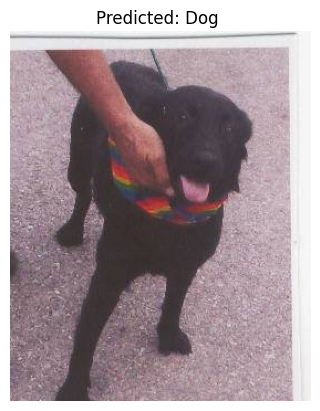

In [28]:
Predicted_value = model.predict([hist])  
plt.imshow(img)
plt.axis('off')
plt.title("Predicted: Cat " if Predicted_value[0] == 0 else "Predicted: Dog ")
plt.show()

### Save My Model

In [29]:
import joblib 
joblib.dump(model,"Animals_Classifier.pkl")

['Animals_Classifier.pkl']

### This is the end of my model 